In [803]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.stats import poisson 

from apprenticheshiplearning.problems.inventory import Inventory
from apprenticheshiplearning.classes.solver import SolverMdp, SolverSMD

In [804]:
np.random.seed(1234456)

### Setting

In [805]:
max_inventory = 15
demand_lambda = 10
holding_cost = 0.5
order_cost = 3
selling_price = 15
gamma = 0.9

In [806]:
inventory = Inventory(max_inventory, demand_lambda, selling_price, holding_cost, order_cost, gamma)
inventory.get_mdp_forward()

Cost range:  -129.9812290598009 0.0


In [807]:
mini = -129.9812290598009
maxi = 0

### Forward

#### Optimal

In [808]:
solver_expert = SolverMdp(inventory.mdp_forward)
prob, mu_e = solver_expert.solve()
policy_e = inventory.mdp_forward.get_policy_from_mu(mu_e.value)

n = len(inventory.mdp_forward.S)
visualize_policy = np.zeros(n)
for i in range(n):
    visualize_policy[i] = np.argmax(policy_e[i])

print("Optimal policy:", visualize_policy)
mu_optimal = mu_e.value
mu_optimal= np.maximum(mu_optimal, 0)
mu_optimal = mu_optimal / np.sum(mu_optimal)

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Nov 22 09:52:20 AM: Your problem has 256 variables, 272 constraints, and 0 parameters.
(CVXPY) Nov 22 09:52:20 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 22 09:52:20 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 22 09:52:20 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Nov 22 09:52:20 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 22 09:52:20 AM: Compiling problem (target solver=CLARABEL

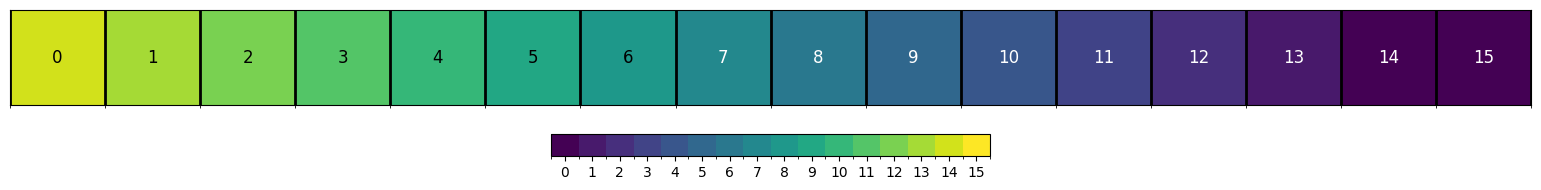

In [746]:
plt.rcParams.update(plt.rcParamsDefault)

data = visualize_policy.reshape(1, -1)
fig, ax = plt.subplots(figsize=(16, 2))

bounds = np.arange(-0.5, 16.5, 1)


cmap = plt.get_cmap('viridis', 16) 
norm = mcolors.BoundaryNorm(bounds, cmap.N)

im = ax.imshow(data, cmap=cmap, norm=norm, aspect='equal')

for i in range(data.shape[1]):
    val = data[0, i]
    text_color = 'white' if val < 8 else 'black'
    
    # Adjusted position slightly to center in the grid box
    ax.text(i, 0, str(i), ha='center', va='center', color=text_color, fontsize=12)

# Update grid ticks to match the shape of data
ax.set_xticks(np.arange(-0.5, data.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-0.5, 1, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
ax.tick_params(which='major', bottom=False, left=False, labelbottom=False, labelleft=False)

# 4. Configure the colorbar with ticks centered on the integers
cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.2, ticks=np.arange(0, 16))
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

#### Suboptimal

In [747]:
max_inventory_sub = 15
demand_lambda_sub = 10
holding_cost_sub = 8
order_cost_sub = 5
selling_price_sub = 15
gamma_sub = 0.9
inventory_sub = Inventory(max_inventory_sub, demand_lambda_sub, selling_price_sub, holding_cost_sub, order_cost_sub, gamma_sub)
inventory_sub.get_mdp_forward()

Cost range:  -44.522485912870934 177.5187709401991


In [748]:
solver_expert = SolverMdp(inventory_sub.mdp_forward)
prob, mu_e = solver_expert.solve()
policy_e = inventory_sub.mdp_forward.get_policy_from_mu(mu_e.value)

n = len(inventory_sub.mdp_forward.S)
visualize_policy_sub = np.zeros(n)
for i in range(n):
    visualize_policy_sub[i] = np.argmax(policy_e[i])

print("Suboptimal policy:", visualize_policy_sub)

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Nov 21 05:19:03 PM: Your problem has 256 variables, 272 constraints, and 0 parameters.
(CVXPY) Nov 21 05:19:03 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 21 05:19:03 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 21 05:19:03 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Nov 21 05:19:03 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 21 05:19:03 PM: Compiling problem (target solver=CLARABEL

In [697]:
mu_expert = mu_e.value
mu_expert = np.maximum(mu_expert, 0)
mu_expert = mu_expert / np.sum(mu_expert)

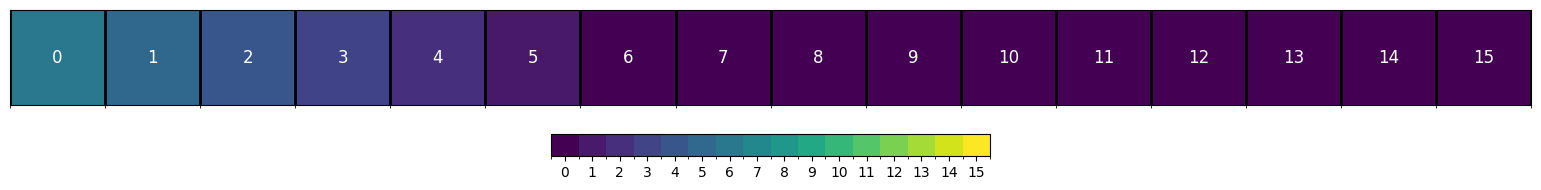

In [749]:
plt.rcParams.update(plt.rcParamsDefault)

data = visualize_policy_sub.reshape(1, -1)
fig, ax = plt.subplots(figsize=(16, 2))

bounds = np.arange(-0.5, 16.5, 1)


cmap = plt.get_cmap('viridis', 16) 
norm = mcolors.BoundaryNorm(bounds, cmap.N)

im = ax.imshow(data, cmap=cmap, norm=norm, aspect='equal')

for i in range(data.shape[1]):
    val = data[0, i]
    text_color = 'white' if val < 8 else 'black'
    
    # Adjusted position slightly to center in the grid box
    ax.text(i, 0, str(i), ha='center', va='center', color=text_color, fontsize=12)

# Update grid ticks to match the shape of data
ax.set_xticks(np.arange(-0.5, data.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-0.5, 1, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
ax.tick_params(which='major', bottom=False, left=False, labelbottom=False, labelleft=False)

# 4. Configure the colorbar with ticks centered on the integers
cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.2, ticks=np.arange(0, 16))
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

#### SMD

In [750]:
def cost_est(s, a, sell_price_est, demand_lambda_est, order_cost_est, holding_cost_est):
    expected_income = np.sum([sell_price_est * min(s + a, d) * poisson.pmf(d, demand_lambda_est) for d in range(max_inventory + 1)])
    ordering_cost = order_cost_est * a
    holding_cost = holding_cost_est * (s + a)
    return ordering_cost + holding_cost - expected_income

def get_c_hat(S, A, sell_price_est, demand_lambda_est, order_cost_est, holding_cost_est):
        c = np.zeros((len(S) * len(A)))
        for s in S:
            for a in A:
                c[s + len(S) * a] = cost_est(s, a, sell_price_est, demand_lambda_est, order_cost_est, holding_cost_est)
        return c

selling_price_est = 14
order_cost_est = 4
holding_cost_est = 2
c_hat = get_c_hat(inventory.mdp_forward.S, inventory.mdp_forward.A, selling_price_est, demand_lambda, order_cost_est, holding_cost_est)
c_hat = 2 * (c_hat - mini) / (maxi- mini) - 1

In [680]:
alpha = 0.3#0.3
mu_e = mu_expert
c_0 = np.zeros(len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A))
u_0 = np.zeros(len(inventory.mdp_forward.S))
mu_0 = np.ones(len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A)) / (len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A))
T = 10000 #10000
N = 100 #100

In [681]:
solver_smd = SolverSMD(inventory, c_hat, alpha, mu_e, c_0, u_0, mu_0, 1e-2, 1e-2, T) #1e-2, 1e-2
c, u, mu = solver_smd.solve_expected(N, graphics=False)

Simulation 1/100
Simulation 2/100
Simulation 3/100
Simulation 4/100
Simulation 5/100
Simulation 6/100
Simulation 7/100
Simulation 8/100
Simulation 9/100
Simulation 10/100
Simulation 11/100
Simulation 12/100
Simulation 13/100
Simulation 14/100
Simulation 15/100
Simulation 16/100
Simulation 17/100
Simulation 18/100
Simulation 19/100
Simulation 20/100
Simulation 21/100
Simulation 22/100
Simulation 23/100
Simulation 24/100
Simulation 25/100
Simulation 26/100
Simulation 27/100
Simulation 28/100
Simulation 29/100
Simulation 30/100
Simulation 31/100
Simulation 32/100
Simulation 33/100
Simulation 34/100
Simulation 35/100
Simulation 36/100
Simulation 37/100
Simulation 38/100
Simulation 39/100
Simulation 40/100
Simulation 41/100
Simulation 42/100
Simulation 43/100
Simulation 44/100
Simulation 45/100
Simulation 46/100
Simulation 47/100
Simulation 48/100
Simulation 49/100
Simulation 50/100
Simulation 51/100
Simulation 52/100
Simulation 53/100
Simulation 54/100
Simulation 55/100
Simulation 56/100
S

In [682]:
mu_e @ inventory.mdp_forward.c, mu @ inventory.mdp_forward.c, mu @ c, mu_e @ c

(np.float64(-0.033601760920853145),
 np.float64(-0.13737250367673023),
 np.float64(0.15222735150840985),
 np.float64(-0.6874916175615947))

Learned policy: [13.  2.  3.  2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


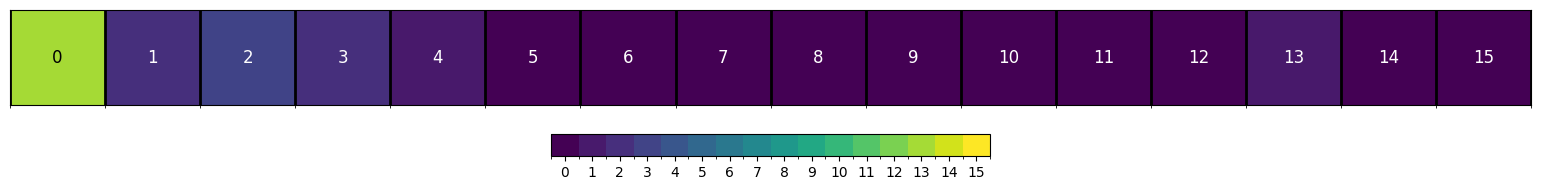

In [683]:
policy_e = inventory_sub.mdp_forward.get_policy_from_mu(mu)
n = len(inventory_sub.mdp_forward.S)
visualize_policy_smd = np.zeros(n)
for i in range(n):
    visualize_policy_smd[i] = np.argmax(policy_e[i])
print("Learned policy:", visualize_policy_smd)
plt.rcParams.update(plt.rcParamsDefault)

data = visualize_policy_smd.reshape(1, -1)
fig, ax = plt.subplots(figsize=(16, 2))

bounds = np.arange(-0.5, 16.5, 1)


cmap = plt.get_cmap('viridis', 16) 
norm = mcolors.BoundaryNorm(bounds, cmap.N)

im = ax.imshow(data, cmap=cmap, norm=norm, aspect='equal')

for i in range(data.shape[1]):
    val = data[0, i]
    text_color = 'white' if val < 8 else 'black'
    
    # Adjusted position slightly to center in the grid box
    ax.text(i, 0, str(i), ha='center', va='center', color=text_color, fontsize=12)

# Update grid ticks to match the shape of data
ax.set_xticks(np.arange(-0.5, data.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-0.5, 1, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
ax.tick_params(which='major', bottom=False, left=False, labelbottom=False, labelleft=False)

# 4. Configure the colorbar with ticks centered on the integers
cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.2, ticks=np.arange(0, 16))
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

In [684]:
def estimate_inventory_costs(mdp, cost_vector, demand_lambda, mini, maxi):
    data_points = []
    for i in range(len(cost_vector)):
        s,a = mdp.get_sa_from_index(i)
        data_points.append((s, a, ((cost_vector[i] +1) / 2) * (maxi - mini) + mini))

    def calculate_expected_sales(s, a):
        expected_sales = 0.0
        for d in range(len(mdp.S)):
            sales = min(s + a, d)
            expected_sales += sales * poisson.pmf(d, demand_lambda)
        return expected_sales
    
    N = len(data_points)

    A = np.zeros((N, 3))
    b = np.zeros(N)

    for i, (s, a, cost) in enumerate(data_points):
        # A matrix columns: [C_order (a), C_hold (s+a), C_sell (-E[sales])]
        A[i, 0] = a                     # Coefficient for order_cost
        A[i, 1] = s + a                 # Coefficient for holding_cost
        A[i, 2] = -calculate_expected_sales(s, a) # Coefficient for sell_price
        
        b[i] = cost

    x, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
    return x.tolist()

estimated_costs = estimate_inventory_costs(inventory.mdp_forward, c, demand_lambda, mini, maxi)
print("Estimated Costs (order_cost, holding_cost, sell_price):", estimated_costs)

Estimated Costs (order_cost, holding_cost, sell_price): [3.8058487716079137, 2.0428907556629903, 13.91535273146086]


### Ablation c_hat

In [850]:
def ablation_chat(inventory, 
                  alpha,
                  T,
                  N,
                  mu_optimal, 
                  epsilons, 
                  holding_cost, 
                  order_cost, 
                  selling_price, 
                  demand_lambda,
                  mini,
                  maxi, 
                  sims=5):
    results_l1 = []
    results_l2 = []
    results_linf = []
    results_order_cost = []
    results_holding_cost = []
    results_selling_price = []
    results_apprentice_expectedcost = []
    for epsilon in epsilons:
        avg_order_cost = 0
        avg_holding_cost = 0
        avg_selling_price = 0
        avg_l1 = 0
        avg_l2 = 0
        avg_linf = 0
        avg_apprentice_expectedcost = 0
        for i in range(sims):
            selling_price_est = selling_price + epsilon*1.5 * np.random.uniform(-1, 1)
            order_cost_est = order_cost + epsilon*0.3 * np.random.uniform(-1, 1)
            holding_cost_est = holding_cost + epsilon*0.05 * np.random.uniform(-1, 1)
            c_hat = get_c_hat(inventory.mdp_forward.S, inventory.mdp_forward.A, selling_price_est, demand_lambda, order_cost_est, holding_cost_est)
            c_hat = 2 * (c_hat - mini) / (maxi - mini) - 1
            c_0 = np.zeros(len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A))
            u_0 = np.zeros(len(inventory.mdp_forward.S))
            mu_0 = np.ones(len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A)) / (len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A))

            solver_smd = SolverSMD(inventory, c_hat, alpha, mu_optimal, c_0, u_0, mu_0, 1e-2, 1e-2, T)
            c, u, mu = solver_smd.solve_expected(N, graphics=False)

            order_cost, holding_cost, sell_price = estimate_inventory_costs(inventory.mdp_forward, c, demand_lambda, mini, maxi)
            avg_order_cost += order_cost
            avg_holding_cost += holding_cost
            avg_selling_price += sell_price

            avg_l1 += np.linalg.norm(c - inventory.mdp_forward.c, 1)
            avg_l2 += np.linalg.norm(c - inventory.mdp_forward.c, 2)
            avg_linf += np.linalg.norm(c - inventory.mdp_forward.c, np.inf)
            avg_apprentice_expectedcost += mu @ inventory.mdp_forward.c

        avg_order_cost /= sims
        avg_holding_cost /= sims
        avg_selling_price /= sims
        avg_l1 /= sims
        avg_l2 /= sims
        avg_linf /= sims
        results_order_cost.append(avg_order_cost)
        results_holding_cost.append(avg_holding_cost)
        results_selling_price.append(avg_selling_price)
        
        results_l1.append(avg_l1)
        results_l2.append(avg_l2)
        results_linf.append(avg_linf)

        results_apprentice_expectedcost.append(avg_apprentice_expectedcost)

    return results_l1, results_l2, results_linf, results_order_cost, results_holding_cost, results_selling_price, results_apprentice_expectedcost


In [851]:
epsilons = np.linspace(0, 10, 100)

alpha = 0.1
c_0 = np.zeros(len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A))
u_0 = np.zeros(len(inventory.mdp_forward.S))
mu_0 = np.ones(len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A)) / (len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A))
T = 10000
N = 20

ablation_results_alpha01 = ablation_chat(inventory, alpha, T, N, mu_optimal, epsilons, holding_cost, order_cost, selling_price, demand_lambda, mini, maxi)
with open('new_ablation_results_alpha01.pkl', 'wb') as f:
    pickle.dump(ablation_results_alpha01, f)

alpha = 0.3
ablation_results_alpha03 = ablation_chat(inventory, alpha, T, N, mu_optimal, epsilons, holding_cost, order_cost, selling_price, demand_lambda, mini, maxi)
with open('new_ablation_results_alpha03.pkl', 'wb') as f:
    pickle.dump(ablation_results_alpha03, f)

alpha = 0.5
ablation_results_alpha05 = ablation_chat(inventory, alpha, T, N, mu_optimal, epsilons, holding_cost, order_cost, selling_price, demand_lambda, mini, maxi)
with open('new_ablation_results_alpha05.pkl', 'wb') as f:
    pickle.dump(ablation_results_alpha05, f)

Simulation 1/20
Simulation 2/20
Simulation 3/20
Simulation 4/20
Simulation 5/20
Simulation 6/20
Simulation 7/20
Simulation 8/20
Simulation 9/20
Simulation 10/20
Simulation 11/20
Simulation 12/20
Simulation 13/20
Simulation 14/20
Simulation 15/20
Simulation 16/20
Simulation 17/20
Simulation 18/20
Simulation 19/20
Simulation 20/20
Simulation 1/20
Simulation 2/20
Simulation 3/20
Simulation 4/20
Simulation 5/20
Simulation 6/20
Simulation 7/20
Simulation 8/20
Simulation 9/20
Simulation 10/20
Simulation 11/20
Simulation 12/20
Simulation 13/20
Simulation 14/20
Simulation 15/20
Simulation 16/20
Simulation 17/20
Simulation 18/20
Simulation 19/20
Simulation 20/20
Simulation 1/20
Simulation 2/20
Simulation 3/20
Simulation 4/20
Simulation 5/20
Simulation 6/20
Simulation 7/20
Simulation 8/20
Simulation 9/20
Simulation 10/20
Simulation 11/20
Simulation 12/20
Simulation 13/20
Simulation 14/20
Simulation 15/20
Simulation 16/20
Simulation 17/20
Simulation 18/20
Simulation 19/20
Simulation 20/20
Simulat

In [836]:
# load the pickles
with open('output/new_ablation_results_alpha01.pkl', 'rb') as f:
    ablation_results_alpha01 = pickle.load(f)
with open('output/new_ablation_results_alpha03.pkl', 'rb') as f:
    ablation_results_alpha03 = pickle.load(f)
with open('output/new_ablation_results_alpha05.pkl', 'rb') as f:
    ablation_results_alpha05 = pickle.load(f)
epsilons = np.linspace(0, 10, 50)

In [864]:
l_1, l_2, l_inf, results_order_cost, results_holding_cost, results_selling_price, apprentice_expected = ablation_results_alpha01

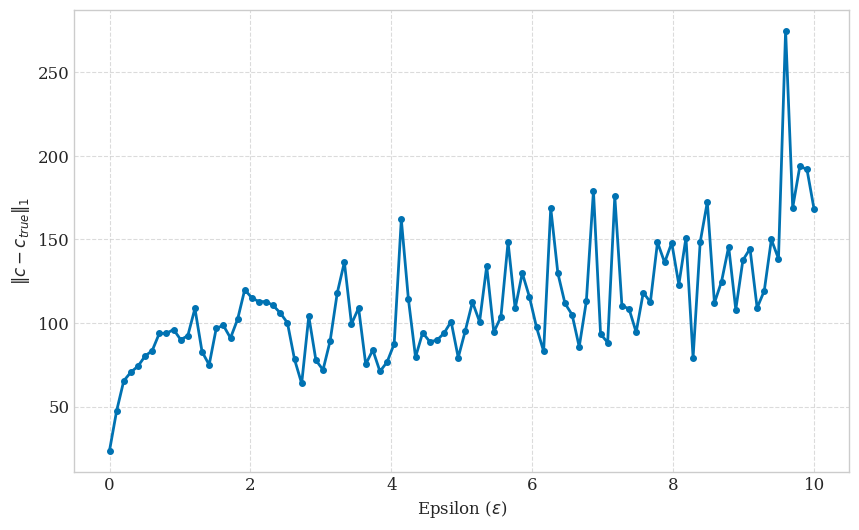

In [865]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'lines.linewidth': 2
})
colors = ['#0072B2', '#D55E00', '#009E73']

plt.figure(figsize=(10, 6))

# 4. Plot with distinct colors, markers, and linestyles
#make smaller markers

plt.plot(epsilons, l_1, marker='o', color=colors[0], markersize=4, linestyle='-', label='L1')
#plt.plot(epsilons, l_2, marker='o', color=colors[1], markersize=4, label='$L^2$')
#plt.plot(epsilons, l_inf, marker='o', color=colors[2], markersize=4, label='$L^\infty$')

# 5. formatted labels
plt.xlabel(r'Epsilon ($\epsilon$)')
plt.ylabel(r'$\Vert c - c_{true} \Vert_1$')

plt.grid(True, linestyle='--', alpha=0.7)
#plt.legend(frameon=True, fancybox=False, edgecolor='black')

plt.show()

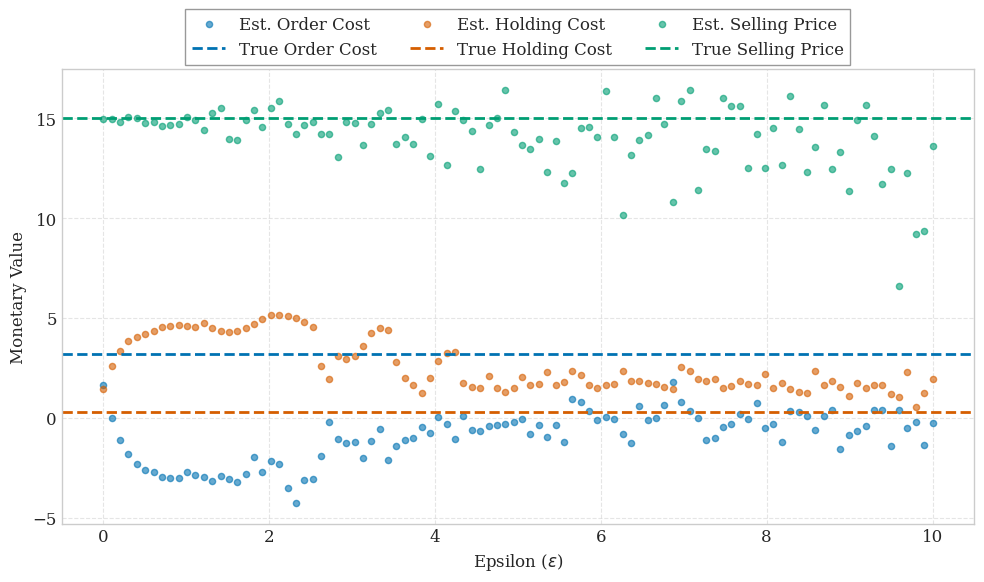

In [866]:
colors = {
    'order': '#0072B2',   # Blue
    'holding': '#D55E00', # Vermillion
    'selling': '#009E73'  # Green
}

plt.figure(figsize=(10, 6))

marker_alpha = 0.6
marker_size = 20

plt.scatter(epsilons, results_order_cost, label='Est. Order Cost', 
            color=colors['order'], alpha=marker_alpha, marker='o', s=marker_size)
plt.axhline(y=order_cost, color=colors['order'], linestyle='--', label='True Order Cost')

plt.scatter(epsilons, results_holding_cost, label='Est. Holding Cost', 
            color=colors['holding'], alpha=marker_alpha, marker='o', s=marker_size)
plt.axhline(y=holding_cost, color=colors['holding'], linestyle='--', label='True Holding Cost')

plt.scatter(epsilons, results_selling_price, label='Est. Selling Price', 
            color=colors['selling'], alpha=marker_alpha, marker='o', s=marker_size)
plt.axhline(y=selling_price, color=colors['selling'], linestyle='--', label='True Selling Price')

plt.xlabel(r'Epsilon ($\epsilon$)')
plt.ylabel('Monetary Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(frameon=True, fancybox=False, edgecolor='black', ncol=3)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=True, fancybox=False, edgecolor='gray')


plt.tight_layout()
plt.show()

### Ablation alpha suboptimal expert

In [ ]:
alphas = np.linspace(0, 1, 100)

recovered_costs = []
l1_distances = []
l_2_distances = []
l_infty_distances = []
expected_cost_apprentice = []
expected_cost_expert = []
expected_cost_apprentice_learned = []
expected_cost_expert_learned = []

for alpha in alphas:
    mu_e = mu_expert
    c_0 = np.zeros(len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A))
    u_0 = np.zeros(len(inventory.mdp_forward.S))
    mu_0 = np.ones(len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A)) / (len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A))
    T = 10000 #10000
    N = 20
    # check that inventory.c is in [-1, 1]
    solver_smd = SolverSMD(inventory, inventory.c, alpha, mu_e, c_0, u_0, mu_0, 1e-2, 1e-2, T) #1e-2, 1e-2
    c, u, mu = solver_smd.solve_expected(N, graphics=False)

    order_cost, holding_cost, sell_price = estimate_inventory_costs(inventory.mdp_forward, c, demand_lambda, mini, maxi)
    recovered_costs.append((order_cost, holding_cost, sell_price))
    l1_distances.append(np.linalg.norm(c - inventory.mdp_forward.c, 1))
    l_2_distances.append(np.linalg.norm(c - inventory.mdp_forward.c, 2))
    l_infty_distances.append(np.linalg.norm(c - inventory.mdp_forward.c, np.inf))
    expected_cost_apprentice.append(mu @ inventory.mdp_forward.c)
    expected_cost_expert.append(mu_e @ inventory.mdp_forward.c)
    expected_cost_apprentice_learned.append(mu @ c)
    expected_cost_expert_learned.append(mu_e @ c)

dict_results = {
    'alphas': alphas,
    'recovered_costs': recovered_costs,
    'l1_distances': l1_distances,
    'l_2_distances': l_2_distances,
    'l_infty_distances': l_infty_distances,
    'expected_cost_apprentice': expected_cost_apprentice,
    'expected_cost_expert': expected_cost_expert,
    'expected_cost_apprentice_learned': expected_cost_apprentice_learned,
    'expected_cost_expert_learned': expected_cost_expert_learned
}

with open('ablation_alpha_results2.pkl', 'wb') as f:
    pickle.dump(dict_results, f)

Simulation 1/20
Simulation 2/20
Simulation 3/20
Simulation 4/20
Simulation 5/20
Simulation 6/20
Simulation 7/20
Simulation 8/20
Simulation 9/20
Simulation 10/20
Simulation 11/20
Simulation 12/20
Simulation 13/20
Simulation 14/20
Simulation 15/20
Simulation 16/20
Simulation 17/20
Simulation 18/20
Simulation 19/20
Simulation 20/20
Simulation 1/20
Simulation 2/20
Simulation 3/20
Simulation 4/20
Simulation 5/20
Simulation 6/20
Simulation 7/20
Simulation 8/20
Simulation 9/20
Simulation 10/20
Simulation 11/20
Simulation 12/20
Simulation 13/20
Simulation 14/20
Simulation 15/20
Simulation 16/20
Simulation 17/20
Simulation 18/20
Simulation 19/20
Simulation 20/20
Simulation 1/20
Simulation 2/20
Simulation 3/20
Simulation 4/20
Simulation 5/20
Simulation 6/20
Simulation 7/20
Simulation 8/20
Simulation 9/20
Simulation 10/20
Simulation 11/20
Simulation 12/20
Simulation 13/20
Simulation 14/20
Simulation 15/20
Simulation 16/20
Simulation 17/20
Simulation 18/20
Simulation 19/20
Simulation 20/20
Simulat

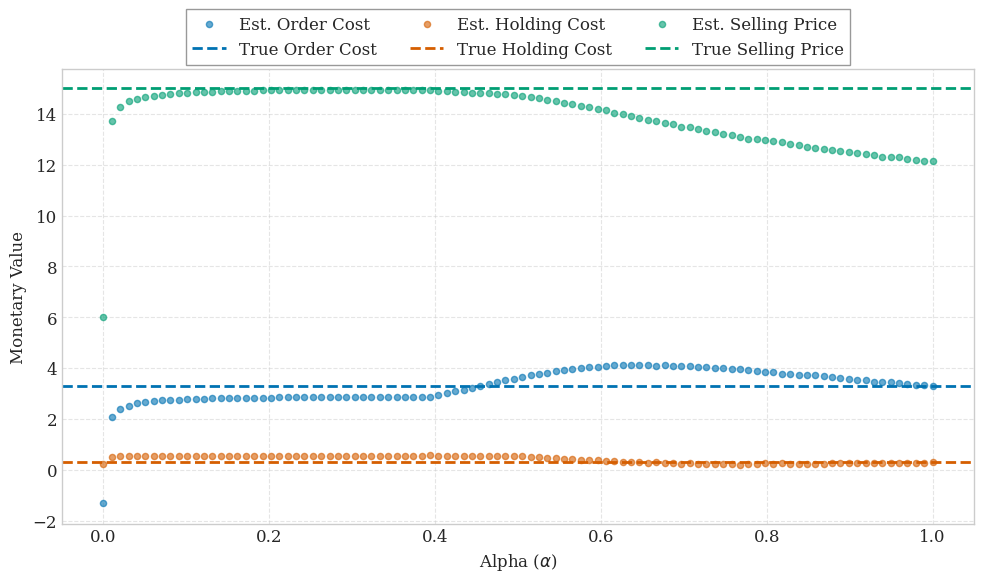

In [879]:
recovered_costs = dict_results['recovered_costs']
results_order_cost = [cost[0] for cost in recovered_costs]
results_holding_cost = [cost[1] for cost in recovered_costs]
results_selling_price = [cost[2] for cost in recovered_costs]

colors = {
    'order': '#0072B2',   # Blue
    'holding': '#D55E00', # Vermillion
    'selling': '#009E73'  # Green
}

plt.figure(figsize=(10, 6))

marker_alpha = 0.6
marker_size = 20

plt.scatter(alphas, results_order_cost, label='Est. Order Cost', 
            color=colors['order'], alpha=marker_alpha, marker='o', s=marker_size)
plt.axhline(y=order_cost, color=colors['order'], linestyle='--', label='True Order Cost')

plt.scatter(alphas, results_holding_cost, label='Est. Holding Cost', 
            color=colors['holding'], alpha=marker_alpha, marker='o', s=marker_size)
plt.axhline(y=holding_cost, color=colors['holding'], linestyle='--', label='True Holding Cost')

plt.scatter(alphas, results_selling_price, label='Est. Selling Price', 
            color=colors['selling'], alpha=marker_alpha, marker='o', s=marker_size)
plt.axhline(y=selling_price, color=colors['selling'], linestyle='--', label='True Selling Price')

plt.xlabel(r'Alpha ($\alpha$)')
plt.ylabel('Monetary Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(frameon=True, fancybox=False, edgecolor='black', ncol=3)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=True, fancybox=False, edgecolor='gray')


plt.tight_layout()
plt.show()

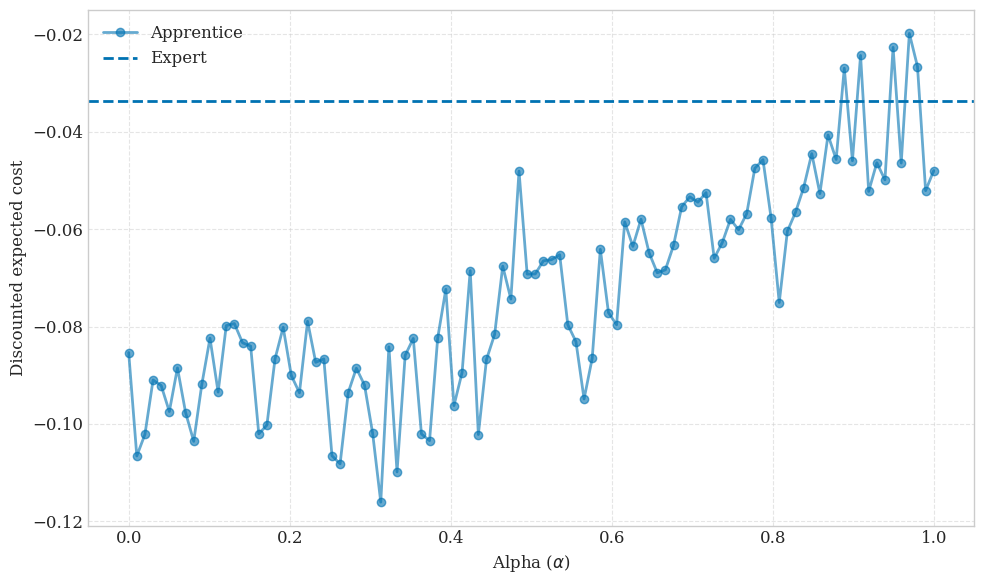

In [880]:
costs_apprentice= dict_results['expected_cost_apprentice']
costs_expert = dict_results['expected_cost_expert']

plt.figure(figsize=(10, 6))
plt.plot(alphas, costs_apprentice, label='Apprentice', color=colors['order'], marker='o', alpha=0.6)
plt.axhline(y=costs_expert[0], color=colors['order'], linestyle='--', label='Expert')
plt.xlabel(r'Alpha ($\alpha$)')
plt.ylabel('Discounted expected cost')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

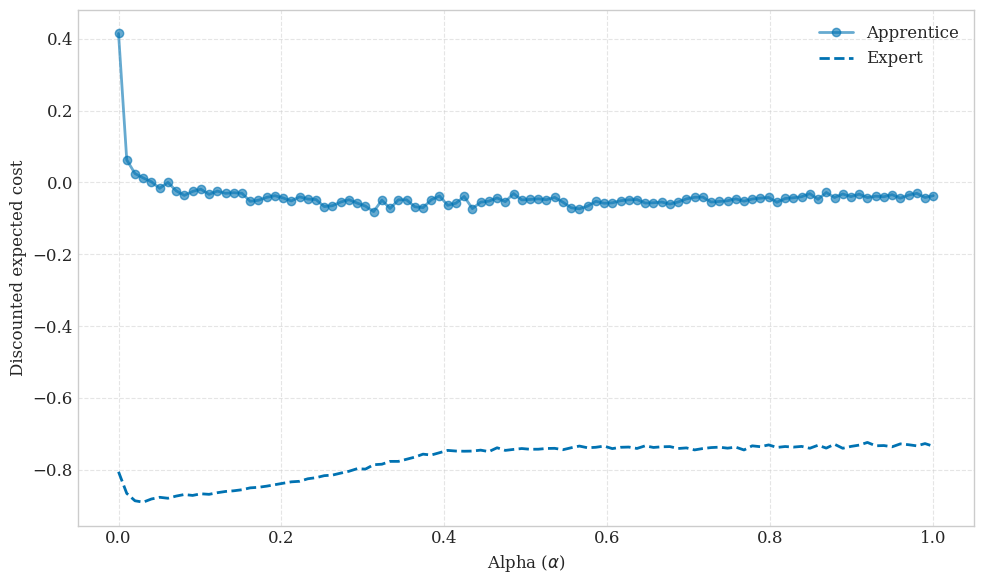

In [885]:
costs_apprentice= dict_results['expected_cost_apprentice_learned']
costs_expert = dict_results['expected_cost_expert_learned']

plt.figure(figsize=(10, 6))
plt.plot(alphas, costs_apprentice, label='Apprentice', color=colors['order'], marker='o', alpha=0.6)
plt.plot(alphas, costs_expert, color=colors['order'], linestyle='--', label='Expert')
plt.xlabel(r'Alpha ($\alpha$)')
plt.ylabel('Discounted expected cost')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

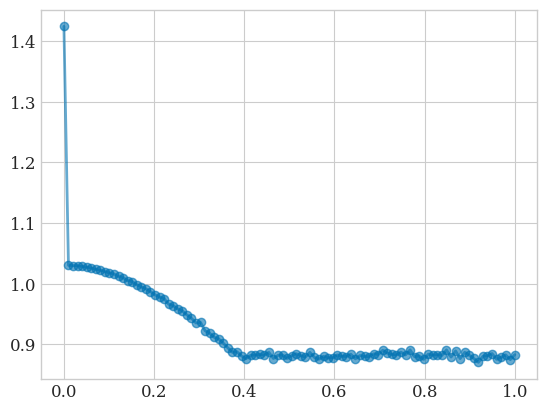

In [884]:
plt.plot(alphas, dict_results['l_infty_distances'], label='L1', color=colors['order'], marker='o', alpha=0.6)
plt.show()